In [1]:
import anndata as ad
import pandas as pd
import numpy as np
import torch

In [2]:
adata = ad.read_h5ad('/Users/jaekwonjung/Desktop/Goyal_lab/Perturb-seq_model/latent.h5ad')

In [ ]:
# ===== Load Latent Embeddings from AnnData =====
z_all = torch.tensor(adata.X, dtype=torch.float32)
pert_labels, uniques = pd.factorize(adata.obs['perturbation'])
y_all_tensor = torch.tensor(pert_labels, dtype=torch.long)

In [4]:
# Train / Valid / Test split
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# First split off test set (10%)
z_trainval, z_test, y_trainval, y_test = train_test_split(
    z_all, y_all_tensor, test_size=0.1, stratify=y_all_tensor.cpu(), random_state=42
)

# Then split trainval into train (80%) and val (10%)
val_fraction = 0.1 / 0.9
z_train, z_val, y_train, y_val = train_test_split(
    z_trainval, y_trainval, test_size=val_fraction, stratify=y_trainval.cpu(), random_state=42
)

z_train_numpy = z_train.cpu().numpy()
z_val_numpy = z_val.cpu().numpy()   
z_test_numpy = z_test.cpu().numpy()

y_train_numpy = y_train.cpu().numpy()
y_val_numpy = y_val.cpu().numpy()
y_test_numpy = y_test.cpu().numpy()

np.save('z_train.npy', z_train_numpy)
np.save('z_val.npy', z_val_numpy)
np.save('z_test.npy', z_test_numpy)

np.save('y_train.npy', y_train_numpy)
np.save('y_val.npy', y_val_numpy)
np.save('y_test.npy', y_test_numpy)

np.save("perturbation_names.npy", uniques)

/projects/b1042/GoyalLab/jaekj/python/DL_py3.10/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/projects/b1042/GoyalLab/jaekj/python/DL_py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


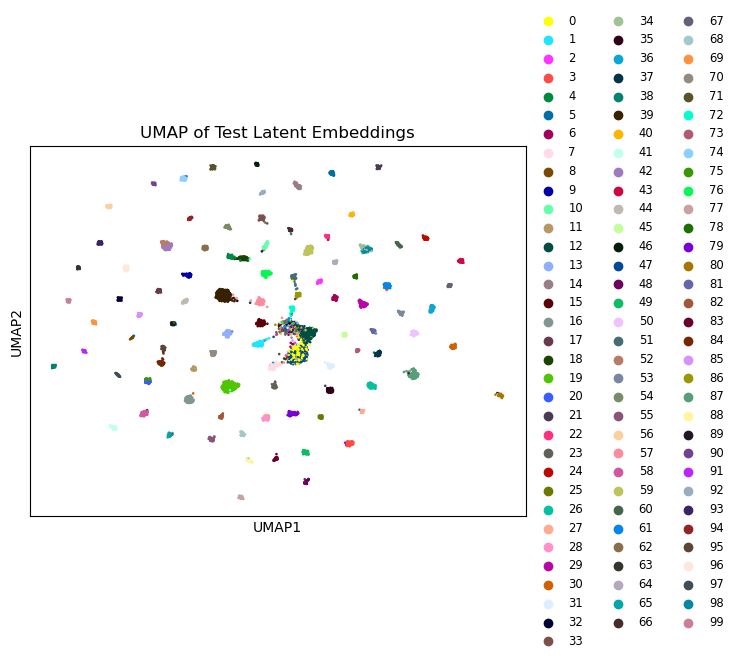

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# -------------------------
# Load saved test data
# -------------------------
z_test = np.load("z_test.npy")
y_test = np.load("y_test.npy")

# Convert labels to strings for plotting
y_test = y_test.astype(str)

# -------------------------
# Build AnnData
# -------------------------
adata_test = ad.AnnData(
    X=z_test,
    obs=pd.DataFrame({"perturbation": y_test})
)

# -------------------------
# Compute neighbors + UMAP
# (no PCA because X = z_test latent)
# -------------------------
sc.pp.neighbors(adata_test, use_rep="X", n_neighbors=15)
sc.tl.umap(adata_test)

# -------------------------
# Plot UMAP
# -------------------------
sc.pl.umap(
    adata_test,
    color="perturbation",
    legend_fontsize="small",
    title="UMAP of Test Latent Embeddings",
    show=True
)

In [9]:
ax = sc.pl.umap(
    adata_test,
    color="perturbation",
    legend_fontsize="small",
    title="UMAP of Test Latent Embeddings",
    show=False
)

fig = ax.figure   

fig.savefig("umap_test.png", dpi=150, bbox_inches="tight")
fig.savefig("umap_test.svg", bbox_inches="tight")
plt.close(fig)

In [10]:
pert_names = np.load("perturbation_names.npy", allow_pickle=True)

In [11]:
y_test

array(['5', '19', '68', ..., '6', '16', '63'], shape=(8477,), dtype='<U21')

In [12]:
adata_test.obs["pert_name"] = pert_names[y_test.astype(int)]

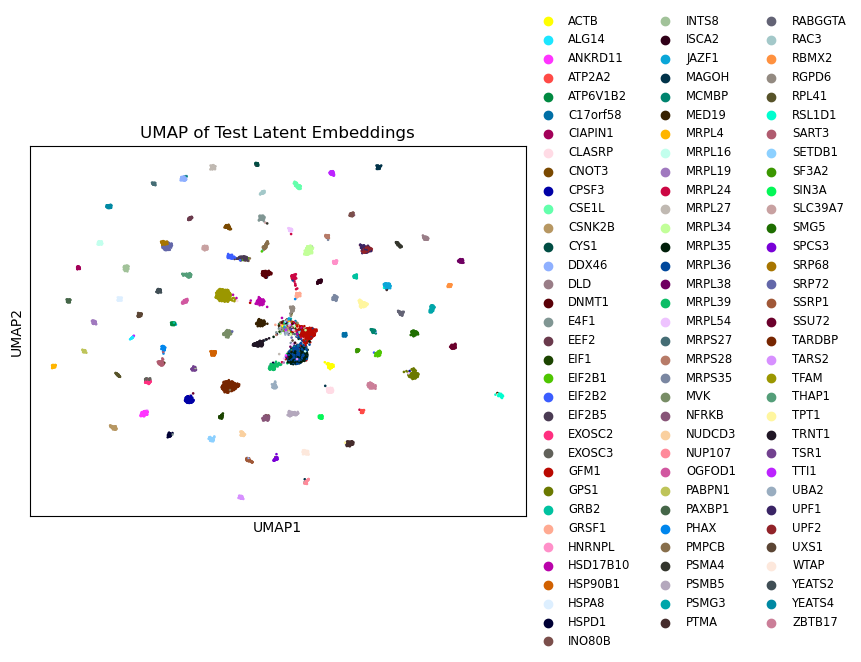

In [13]:
ax = sc.pl.umap(
    adata_test,
    color="pert_name",
    legend_fontsize="small",
    title="UMAP of Test Latent Embeddings",
    show=False
)

In [14]:
fig = ax.figure   # <-- get the Figure from the Axes

fig.savefig("umap_test.png", dpi=150, bbox_inches="tight")
fig.savefig("umap_test.svg", bbox_inches="tight")
plt.close(fig)